In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import re
import json

from collections import OrderedDict
%config InlineBackend.figure_format = 'retina'

### Import questions from json file

In [3]:
full_dataset = '/home/tkornuta/tensorflow/data/clevr_no_images/questions/CLEVR_train_questions.json'
with open(full_dataset) as data_file:    
    data = json.load(data_file)
    questions = data['questions']

Are there more big green things than large purple shiny cubes? yes


### Print loaded dataset size and some exemplary question/answer pairs

In [32]:
print ("number of loaded questions: ", len(questions))
for i in range(10):
    print(i, questions[i]['question'] + ' ' + questions[i]['answer'])

number of loaded questions:  699989
0 Are there more big green things than large purple shiny cubes? yes
1 How many other things are there of the same shape as the tiny cyan matte object? 2
2 Is the color of the large sphere the same as the large matte cube? no
3 What material is the big object that is right of the brown cylinder and left of the large brown sphere? rubber
4 How big is the brown shiny sphere? large
5 How many gray matte things are on the right side of the small rubber cube behind the large brown thing left of the cyan thing? 0
6 What is the shape of the brown thing to the right of the large brown metallic thing that is on the left side of the brown sphere? sphere
7 The brown object that is the same shape as the green shiny thing is what size? large
8 Are there any other things that have the same size as the brown shiny sphere? yes
9 What color is the tiny matte block left of the blue block? gray


### Create question and answer vocabularies

In [42]:
q_vocab = {}
a_vocab = {}

# For all the q-a pairs.
for i, q in enumerate(questions):
    # Get question and answer.
    q_str = q['question']
    a_str = q['answer']
    # Lowercase the answer.
    #a = a_str.lower()
    a = a_str
    # Split question and collect the statistics 
    for word in re.split(r'\s+|[,;?.-]\s*', q_str):
        w = word.lower()
        if w in q_vocab and len(w) is not 0:
            q_vocab[w] += 1
        elif len(w) is not 0:
            q_vocab[w] = 1
    # Collect the answer statistics
    if a in a_vocab:
        a_vocab[a] += 1
    else:
        a_vocab[a] = 1

# Sort by frequency of appearance.
sorted_q_vocab = OrderedDict(sorted(q_vocab.items(), key=lambda t: t[1], reverse=True))
sorted_a_vocab = OrderedDict(sorted(a_vocab.items(), key=lambda t: t[1], reverse=True))

OrderedDict([('no', 143713), ('yes', 139121), ('1', 57907), ('0', 48658), ('small', 31587), ('rubber', 31477), ('metal', 31353), ('large', 31342), ('2', 29855), ('sphere', 21087), ('cylinder', 21051), ('cube', 21014), ('3', 15256), ('yellow', 7974), ('purple', 7973), ('brown', 7926), ('blue', 7873), ('red', 7797), ('gray', 7786), ('green', 7778), ('cyan', 7731), ('4', 7418), ('5', 3615), ('6', 1662), ('7', 647), ('8', 259), ('9', 105), ('10', 24)])


### Display question vocabulary statistics

OrderedDict([('the', 1840293), ('is', 855893), ('of', 751361), ('that', 410029), ('same', 356333), ('thing', 338961), ('object', 328165), ('what', 322102), ('as', 319520), ('there', 305987), ('are', 296955), ('cylinder', 227196), ('big', 215977), ('tiny', 212216), ('small', 211638), ('rubber', 207862), ('matte', 207292), ('large', 203961), ('a', 172630), ('number', 151168), ('shape', 149550), ('color', 149349), ('front', 147506), ('in', 147506), ('left', 147462), ('behind', 147409), ('right', 146854), ('metal', 138743), ('things', 138586), ('metallic', 138536), ('shiny', 138356), ('size', 137288), ('material', 133614), ('objects', 127596), ('purple', 122354), ('cyan', 121582), ('blue', 121570), ('yellow', 121117), ('brown', 120977), ('red', 120527), ('gray', 120174), ('green', 119909), ('ball', 114145), ('sphere', 113869), ('block', 113328), ('cube', 113249), ('it', 103187), ('on', 98361), ('side', 98361), ('to', 98221), ('how', 95053), ('have', 88777), ('many', 82962), ('and', 81506),

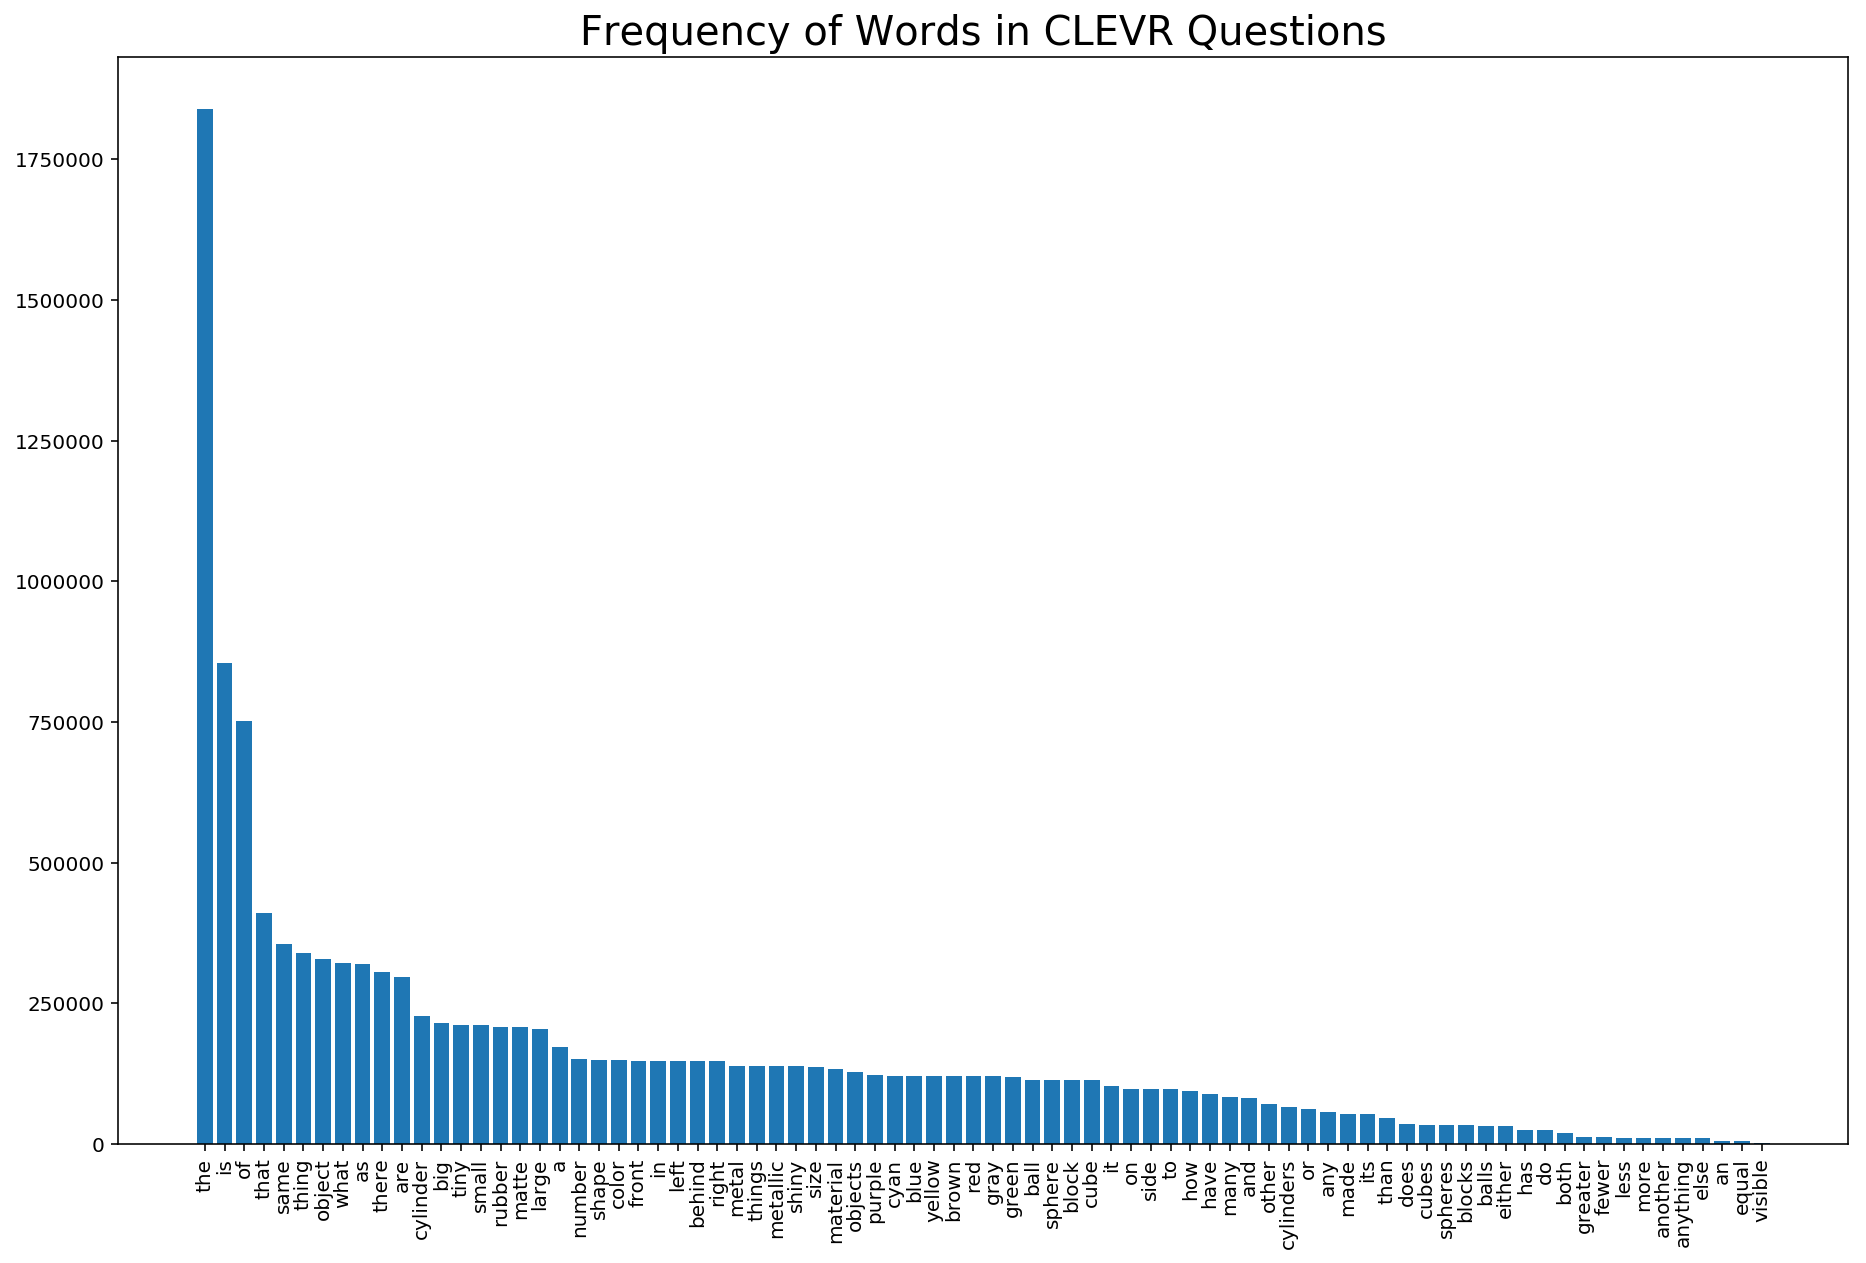

In [43]:
print(sorted_q_vocab)

fig, ax = plt.subplots()
plt.title('Frequency of Words in CLEVR Questions', fontsize=20)
ax.bar(range(len(sorted_q_vocab)), sorted_q_vocab.values(), align='center')
plt.xticks(range(len(sorted_q_vocab)), list(sorted_q_vocab.keys()), rotation='vertical')
fig.set_size_inches(15.5,10)

plt.show()

### Display answers vocabulary statistics

OrderedDict([('no', 143713), ('yes', 139121), ('1', 57907), ('0', 48658), ('small', 31587), ('rubber', 31477), ('metal', 31353), ('large', 31342), ('2', 29855), ('sphere', 21087), ('cylinder', 21051), ('cube', 21014), ('3', 15256), ('yellow', 7974), ('purple', 7973), ('brown', 7926), ('blue', 7873), ('red', 7797), ('gray', 7786), ('green', 7778), ('cyan', 7731), ('4', 7418), ('5', 3615), ('6', 1662), ('7', 647), ('8', 259), ('9', 105), ('10', 24)])


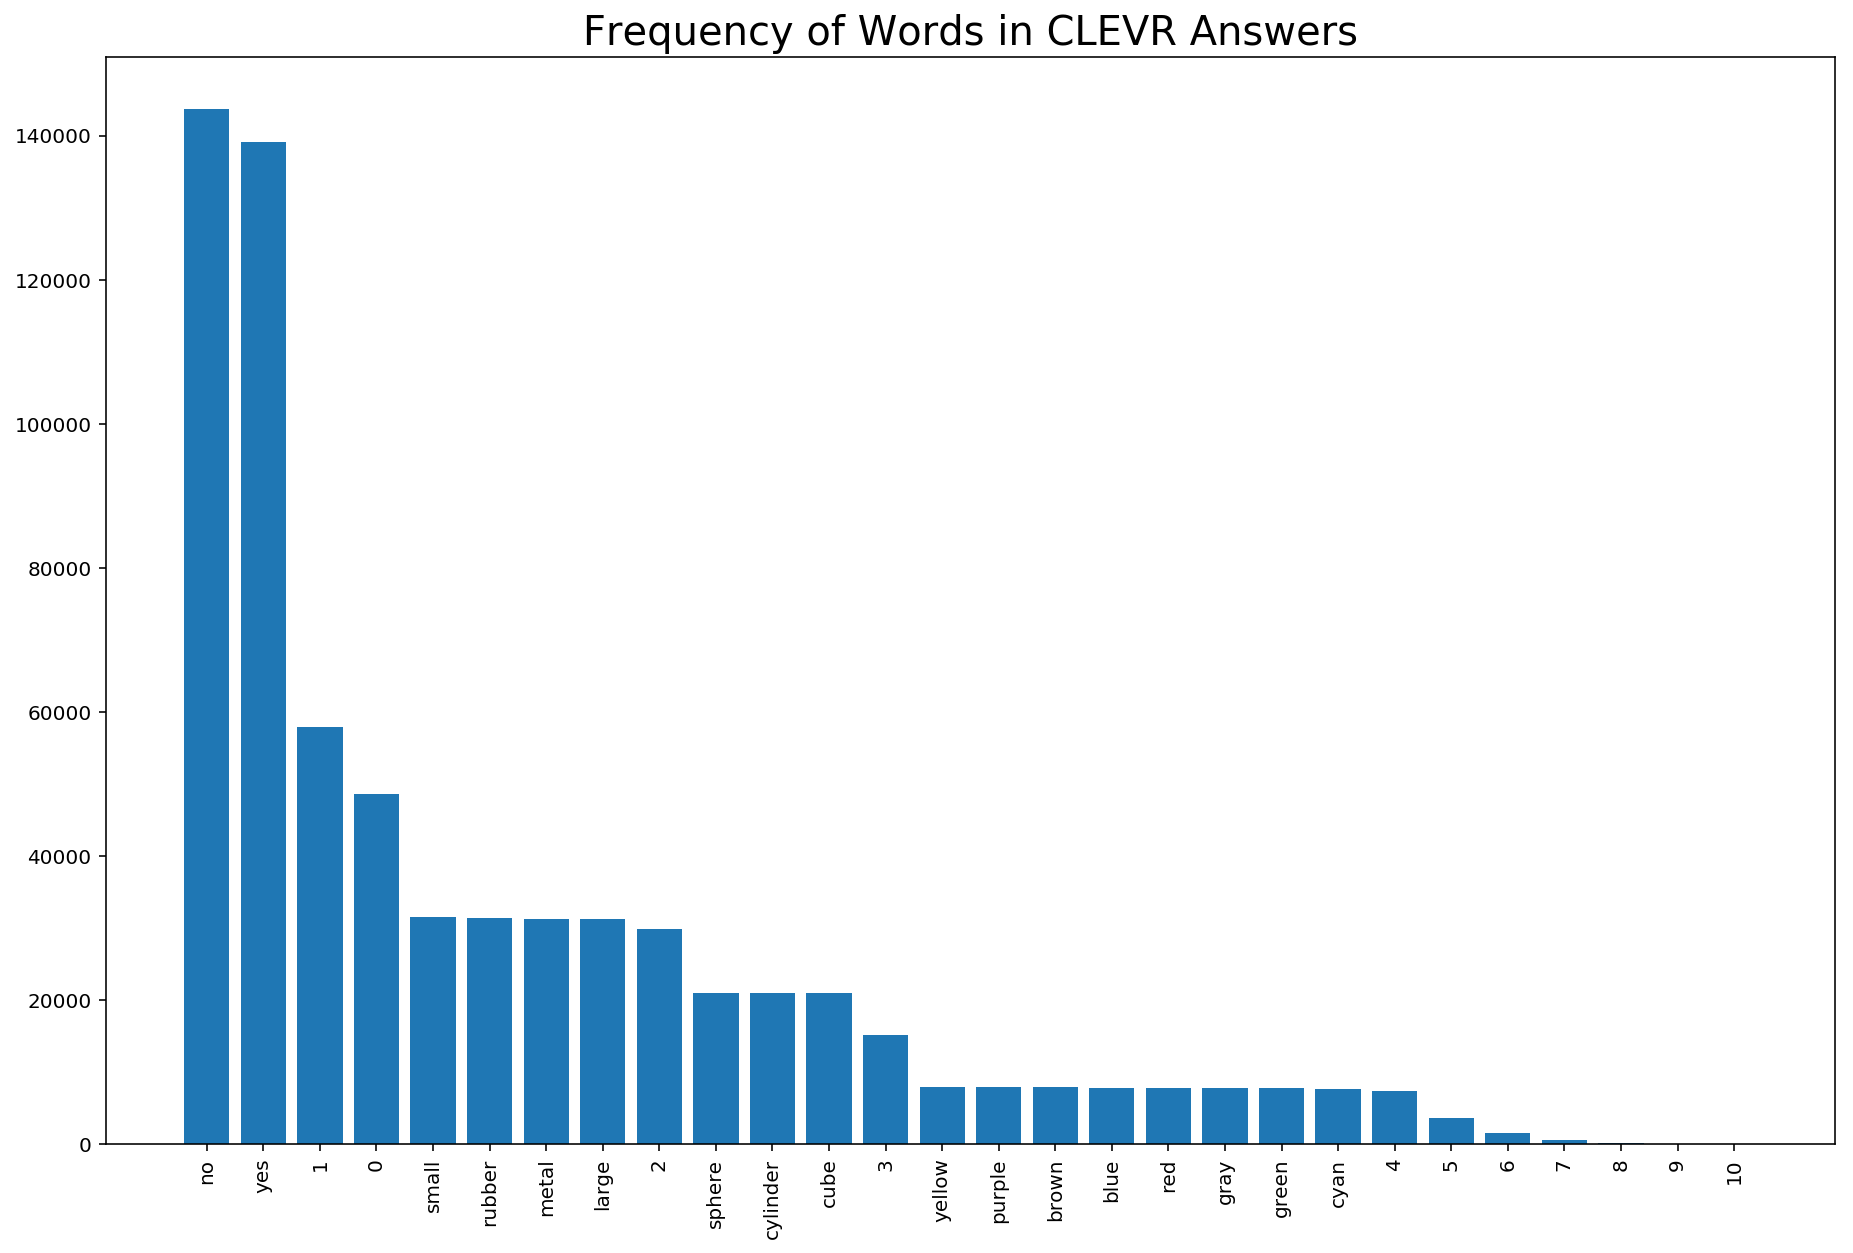

In [44]:
print(sorted_a_vocab)

fig, ax = plt.subplots()

plt.title('Frequency of Words in CLEVR Answers', fontsize=20)
ax.bar(range(len(sorted_a_vocab)), sorted_a_vocab.values(), align='center')
plt.xticks(range(len(sorted_a_vocab)), list(sorted_a_vocab.keys()), rotation='vertical')
fig.set_size_inches(15.5,10)

plt.show()